In [93]:
import os
from torch.utils.data import DataLoader
from data.loaders import SteelLoader, SegmentationMnistDataset
from tqdm.auto import tqdm
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import seaborn_image as isns

In [94]:
n_class = 11
class_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "0", "No digit"]
dataname = "M2NIST"



In [95]:
loader = DataLoader(SegmentationMnistDataset(False))

specific_item_ind = 0
specific_item = loader.dataset[specific_item_ind]

In [96]:
counts = np.zeros(n_class)
classes_represented = np.zeros(n_class)

In [97]:
for x, y, in loader:
    x = np.array(x)
    y = np.array(y)

    y_n_classes_represented = np.count_nonzero(np.sum(y, (2, 3))[:,:-1], axis = 1)
    for i in y_n_classes_represented:
        classes_represented[int(i)] += 1

    for i in range(n_class):
        counts[i] += np.sum(y[:, i])

In [98]:
counts_normed = counts / np.sum(counts)

last_nonzero_rep_ind = 0
for i in range(n_class):
    if classes_represented[i] > 0:
        last_nonzero_rep_ind = i

classes_represented = classes_represented[:last_nonzero_rep_ind + 1]

class_representation_normed = classes_represented / np.sum(classes_represented)

In [99]:
print(counts)
print(counts_normed)

[  17733.   10701.   16799.   12738.   13929.   16799.   14091.   13892.
   19225.   16295. 2535799.]
[0.0065971  0.00398103 0.00624963 0.00473884 0.00518192 0.00624963
 0.00524219 0.00516815 0.00715216 0.00606213 0.94337725]


In [100]:
print(classes_represented)
print(class_representation_normed)

[  0.  54. 427.  19.]
[0.    0.108 0.854 0.038]


Plot pixel representation of the classes

In [101]:
detection_colors = matplotlib.cm.get_cmap("rainbow", n_class - 1)
c_list = [detection_colors(i / (n_class - 1)) for i in range(n_class - 1)] + [(0,0,0)] 
class_colors = matplotlib.colors.LinearSegmentedColormap.from_list("class_colors", c_list)
sns_class_colors = sns.color_palette([class_colors(i / (n_class - 1)) for i in range(n_class)])

/home/011/e/ec/ecj200000/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'M2NIST Pixel Class Distribution')

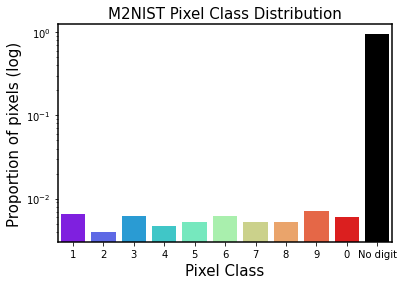

In [102]:
pixel_distr = sns.barplot(class_names,
            counts_normed,
            palette=sns_class_colors)
pixel_distr.set_yscale("log")
pixel_distr.set_xlabel("Pixel Class")
pixel_distr.set_ylabel("Proportion of pixels (log)")
pixel_distr.set_title(f"{dataname} Pixel Class Distribution")

Text(0.5, 1.0, 'M2NIST Multiple-Class Observations')

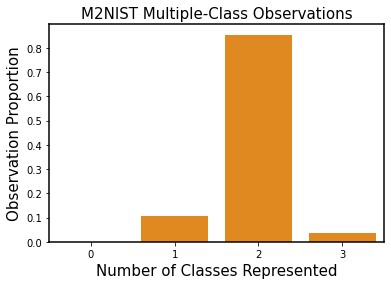

In [103]:
distr_n_represented = sns.barplot(x = [i for i in range(len(classes_represented))],
                                  y = class_representation_normed,
                                  color = "darkorange")
distr_n_represented.set_xlabel("Number of Classes Represented")
distr_n_represented.set_ylabel("Observation Proportion")
distr_n_represented.set_title(f"{dataname} Multiple-Class Observations")